<a href="https://colab.research.google.com/github/crealkiller/Major-Project-1/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [25]:
# Loading the dataset
url = "/content/drive/MyDrive/Dataset/EV_cars1.csv"
df = pd.read_csv(url)

In [26]:
# Data Inspection
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      307 non-null    object 
 1   Fast_charge   307 non-null    int64  
 2   Battery       307 non-null    int64  
 3   Efficiency    307 non-null    int64  
 4   Price.DE.     307 non-null    int64  
 5   Range         307 non-null    int64  
 6   Top_speed     307 non-null    int64  
 7   acceleration  307 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 19.3+ KB
None

First few rows of the dataset:
                  Car_name  Fast_charge  Battery  Efficiency  Price.DE.  \
0  Abarth 500e Convertible            0       38         168      40990   
1    Abarth 500e Hatchback            0       38         168      37990   
2                Aiways U5            0       60         190      39563   
3                Aiways U6            0       60

In [27]:
# Separating features and target variable
X = df.drop("Car_name", axis=1)
y = df["Fast_charge"]

In [28]:
#Data Preprocessing
# Encode categorical column 'Car_name'
label_encoder = LabelEncoder()
df['Car_name'] = label_encoder.fit_transform(df['Car_name'])

# Normalize numerical columns
numerical_columns = ['acceleration']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Separate features and target variable
X = df.drop(['Fast_charge'], axis=1)  # Features
y = df['Fast_charge']  # Target variable

# Print preprocessed data
print(X)
print(y)

     Car_name  Battery  Efficiency  Price.DE.  Range  Top_speed  acceleration
0           0       38         168      40990    225        155     -0.089499
1           1       38         168      37990    225        155     -0.089499
2           2       60         190      39563    315        150      0.072698
3           3       60         171      47588    350        160     -0.089499
4          17       85         202     106050    420        245     -1.030244
..        ...      ...         ...        ...    ...        ...           ...
302       300       94         177      60970    530        200     -0.024620
303       301       94         186      63970    505        200     -1.127563
304       302       94         188      68970    500        200     -1.127563
305       303       64         178      45970    360        180     -0.543652
306       304       64         183      50470    350        180     -1.127563

[307 rows x 7 columns]
0      0
1      0
2      0
3      0
4   

In [29]:
#Feature Engineering

# Create a new column 'Power' by multiplying 'Battery' and 'Top_speed'
df['Power'] = df['Battery'] * df['Top_speed']

# Display the modified DataFrame
print(df)

     Car_name  Fast_charge  Battery  Efficiency  Price.DE.  Range  Top_speed  \
0           0            0       38         168      40990    225        155   
1           1            0       38         168      37990    225        155   
2           2            0       60         190      39563    315        150   
3           3            0       60         171      47588    350        160   
4          17            1       85         202     106050    420        245   
..        ...          ...      ...         ...        ...    ...        ...   
302       300            1       94         177      60970    530        200   
303       301            1       94         186      63970    505        200   
304       302            1       94         188      68970    500        200   
305       303            0       64         178      45970    360        180   
306       304            0       64         183      50470    350        180   

     acceleration  Power  
0       -0.0

In [30]:
# Handling Imbalanced Data (SMOTE)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the imbalanced-learn pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('over', SMOTE(sampling_strategy=0.75)),  # You can adjust the sampling strategy as needed
    ('under', RandomUnderSampler(sampling_strategy=0.8)),  # You can adjust the sampling strategy as needed
])

# Fit the pipeline on the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [31]:
# Analysis (Visualizations and Summary Statistics)

Average Price of Electric Vehicles: 67529.88273615635


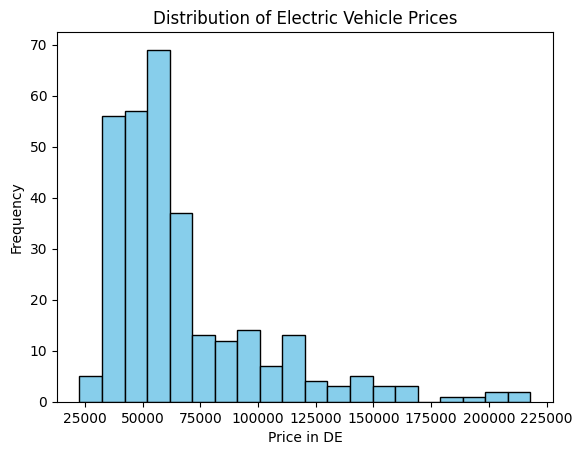

In [32]:
#Average price of Electric Vehicles
average_price = df['Price.DE.'].mean()
print(f'Average Price of Electric Vehicles: {average_price}')
# Example: Plotting a histogram of vehicle prices
plt.hist(df['Price.DE.'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Electric Vehicle Prices')
plt.xlabel('Price in DE')
plt.ylabel('Frequency')
plt.show()

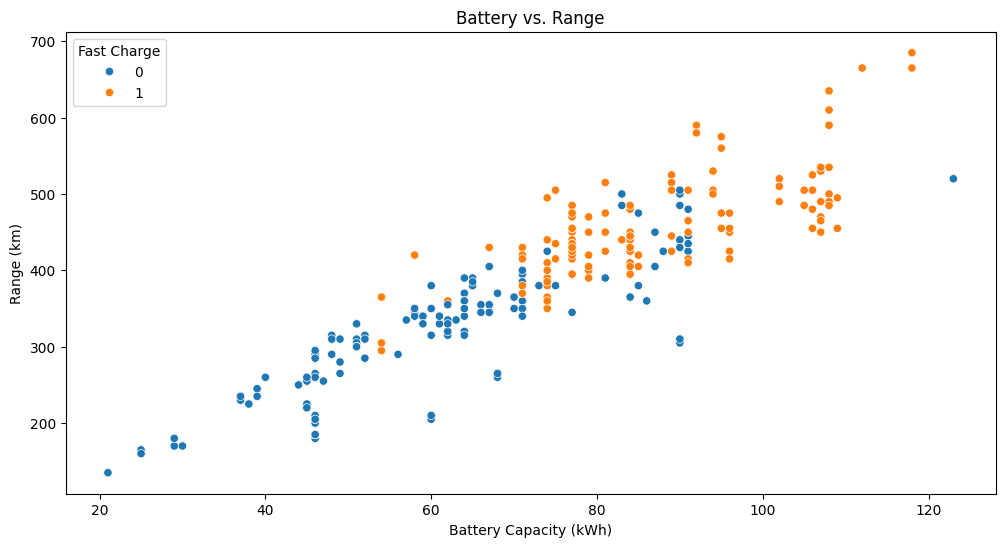

In [33]:
# Scatter plot of Battery vs. Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Battery', y='Range', hue='Fast_charge', data=df)
plt.title('Battery vs. Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.legend(title='Fast Charge')
plt.show()

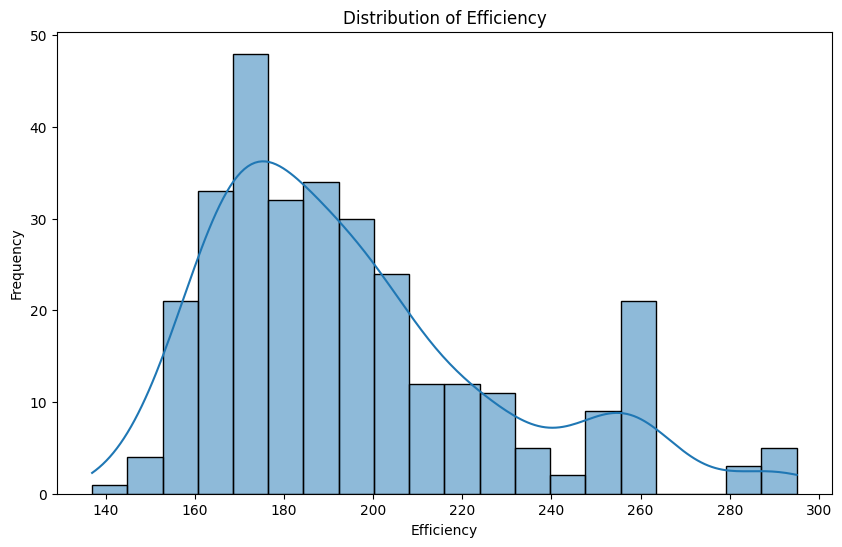

In [34]:
# Histogram of Efficiency
plt.figure(figsize=(10, 6))
sns.histplot(df['Efficiency'], bins=20, kde=True)
plt.title('Distribution of Efficiency')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.show()

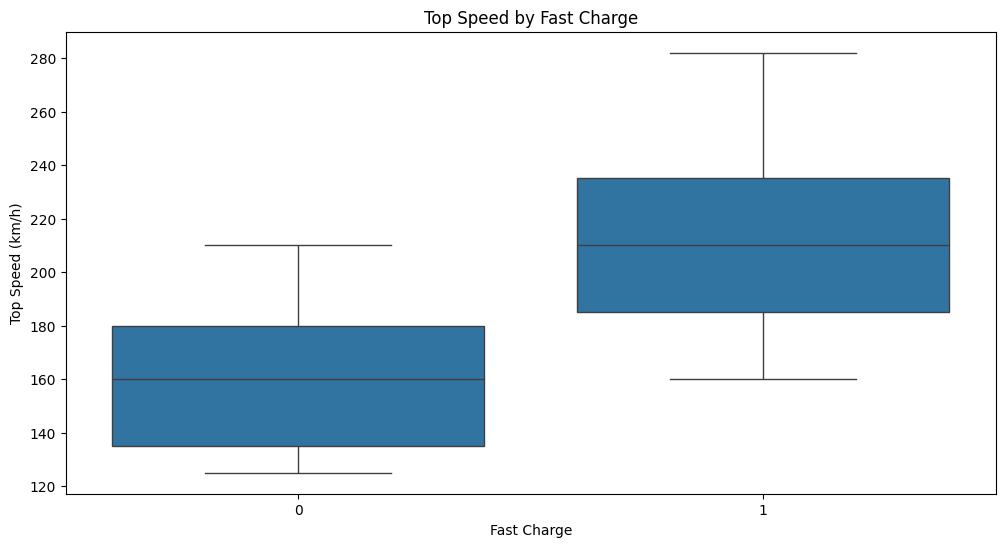

In [35]:
# Boxplot of Top Speed by Fast Charge
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fast_charge', y='Top_speed', data=df)
plt.title('Top Speed by Fast Charge')
plt.xlabel('Fast Charge')
plt.ylabel('Top Speed (km/h)')
plt.show()

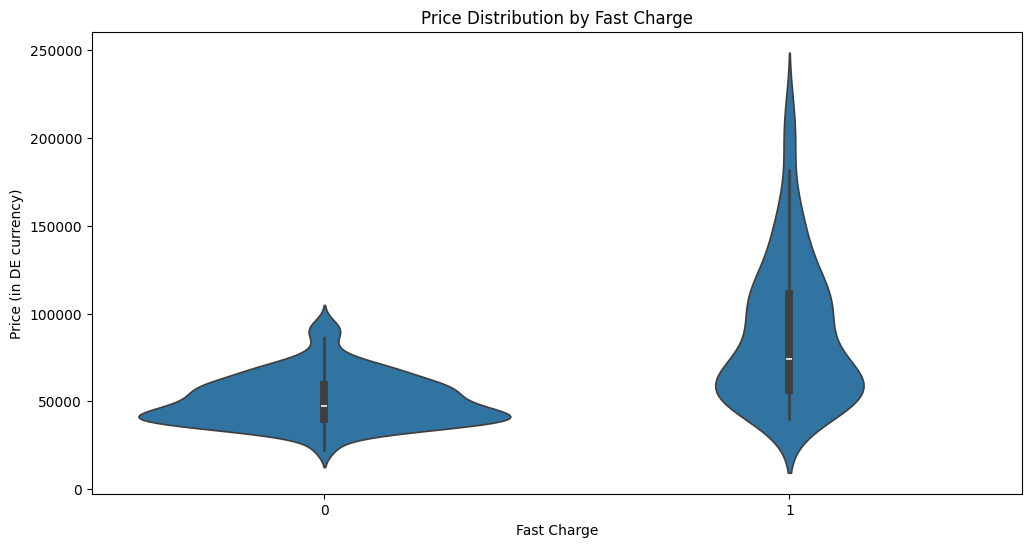

In [36]:
# Violin plot of Price Distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='Fast_charge', y='Price.DE.', data=df)
plt.title('Price Distribution by Fast Charge')
plt.xlabel('Fast Charge')
plt.ylabel('Price (in DE currency)')
plt.show()

<Axes: title={'center': 'Fast Charging available and not available EV'}, ylabel='Fast_charge'>

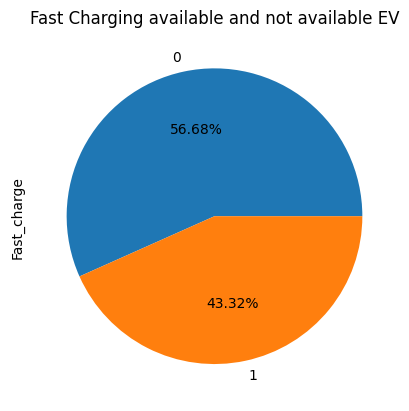

In [37]:
#Plot pie chart of Fast Charging available vehicles
plt.title('Fast Charging available and not available EV')
df['Fast_charge'].value_counts().plot(kind='pie',autopct='%.2f%%')

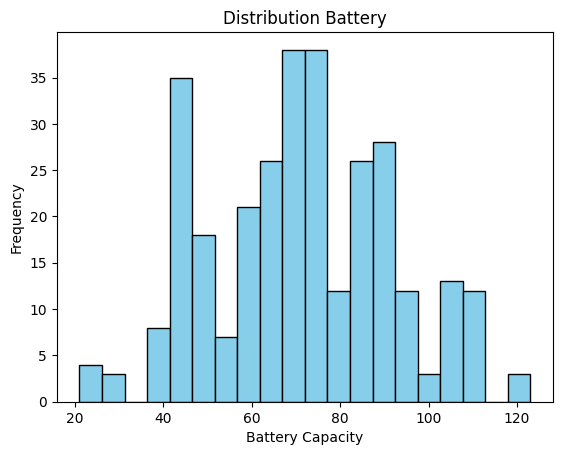

In [38]:
plt.hist(df['Battery'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution Battery')
plt.xlabel('Battery Capacity')
plt.ylabel('Frequency')
plt.show()

In [39]:
#Data transformation
# Save the processed DataFrame to a new CSV file
df.to_csv('processed_dataset.csv', index=False)